# MNISTを利用したPytorchのチュートリアル

In [3]:
!pip install torch torchvision matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

/Users/m20027/Library/Python/3.9/lib/python/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


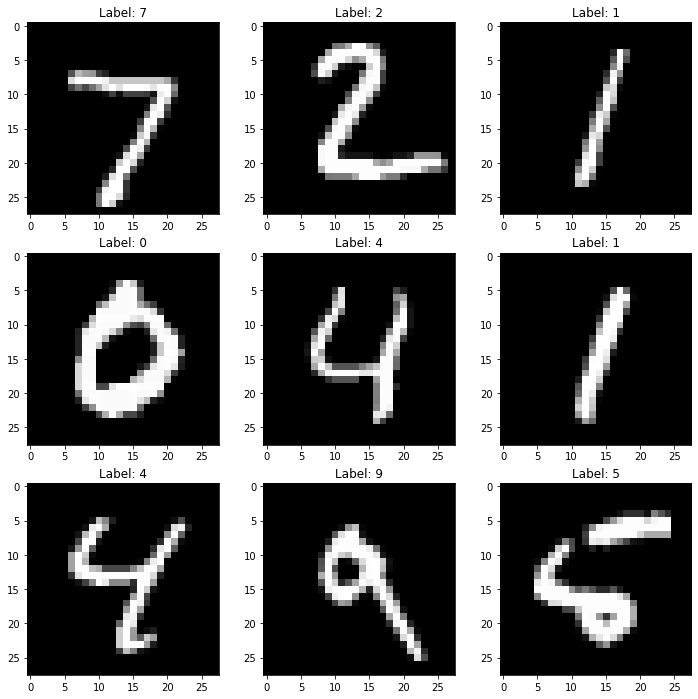

In [5]:
# 利用データの確認
data = datasets.MNIST('/tmp/data', train=False, download=True, transform=transforms.ToTensor())
data_loader = DataLoader(data,
                         batch_size=10,
                         shuffle=False)
data_iter = iter(data_loader)
images, labels = data_iter.next()
fig = plt.figure(figsize=(12, 12))
for i in range(0, 9):
    npimg = images[i].numpy()
    npimg = npimg.reshape((28, 28))
    ax = fig.add_subplot(3, 3, i+1)
    ax.imshow(npimg, cmap='gray')
    ax.set_title(f"Label: {labels[i]}")


In [6]:
images[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [7]:
images[0].shape

torch.Size([1, 28, 28])

In [8]:
# パラメタ
batch_size = 4
lr = 1e-2#活性化関数
log_interval = 2500
max_epoch = 3
if torch.cuda.is_available():
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [9]:
# データのロード
train_data   = datasets.MNIST('/tmp/data', train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

test_data   = datasets.MNIST('/tmp/data', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(test_data, batch_size=1000, shuffle=False)


In [10]:
# 学習モデルの定義
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 64)#64　下の頭と揃える
        self.fc2 = nn.Linear(64, 64)#次元10，ハイパーパラメータ
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
    def forward(self, x):#順伝搬の定義
        x = x.view(-1, 28 * 28)#データの変換　28*28の行列（画像のサイズ）
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [11]:
model = Net() # 学習モデル
#model.to(device)#GPUにモデルのパラメータを与える
optimizer = optim.SGD(model.parameters(), lr=lr) # 最適化アルゴリズム　引数1：モデルのパラメータ，引数2：学習率
loss_func = nn.CrossEntropyLoss() # 損失関数　クロスエントロピーロス
# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

NameError: name 'device' is not defined

In [ ]:
# 訓練
for epoch in range(1, max_epoch+1):#　epoch：回数
    model.train()#　学習
    for batch_idx, (data, target) in enumerate(train_loader):#　3つのミニバッチ
        data, target = Variable(data), Variable(target)#　テンソルで扱えるように
        data, target = data.to(device), target.to(device)#　GPUのため
        
        optimizer.zero_grad() # 勾配の初期化

        output = model(data)#　順方向の伝搬データ（フォワード）

        loss = loss_func(output, target)#　出力情報（推論値），目標値データを元に損失を計算

        loss.backward() # 勾配の計算（勾配効果法）
        optimizer.step() # 勾配の更新

        if batch_idx % log_interval == 0:
          print(f'Train Epoch: {epoch} [{ batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

Train Epoch: 1 [0/60000 (0%)]	Loss: 4.144660
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.041259
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.369160
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.532994
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.929003
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.070284
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.148083
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.043252
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.321905
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.027700
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.120494
Train Epoch: 2 [50000/60000 (83%)]	Loss: 0.040687
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.038471
Train Epoch: 3 [10000/60000 (17%)]	Loss: 0.120133
Train Epoch: 3 [20000/60000 (33%)]	Loss: 0.034564
Train Epoch: 3 [30000/60000 (50%)]	Loss: 0.053971
Train Epoch: 3 [40000/60000 (67%)]	Loss: 0.490566
Train Epoch: 3 [50000/60000 (83%)]	Loss: 0.001255


In [ ]:
# テスト
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:#1000のテストデータ
        data, target = Variable(data), Variable(target)#肩の変換
        data, target = data.to(device), target.to(device)

        output = model(data)#推論

        loss = loss_func(output, target)#比較
        test_loss += loss.item()
        
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_loader.dataset)
    print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)')

Test set: Average loss: 0.0001, Accuracy: 9612/10000 (96%)
